<a href="https://colab.research.google.com/github/RubenCarty/Master-Artificial-Intelligence-UNIR/blob/main/Sol_act3_RNN__Deep_Learning_RubenQuispe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

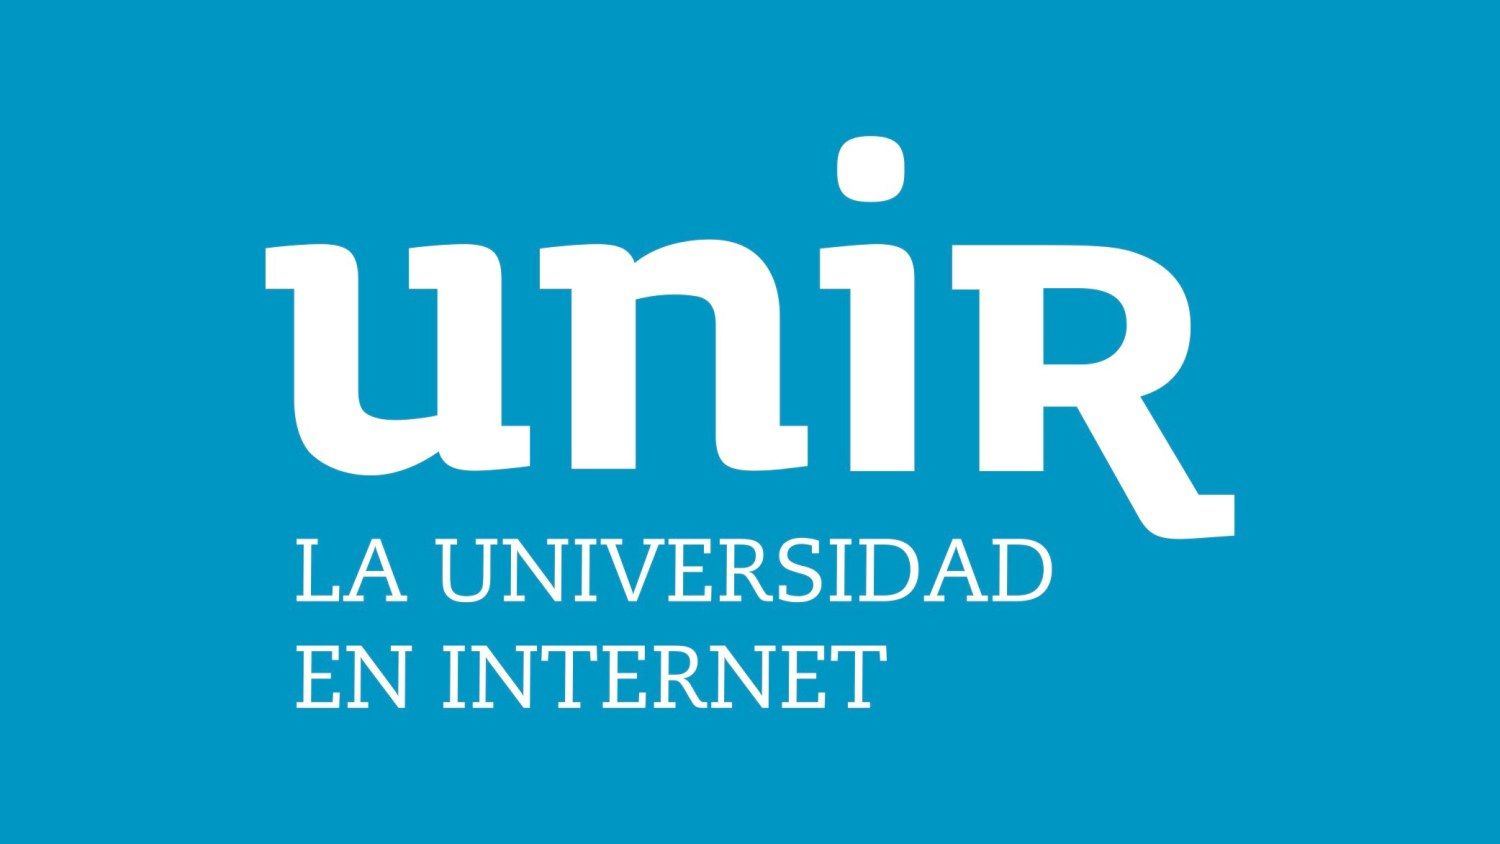

<center>

# **Actividad 3 caso grupal: RNN y sus aplicaciones en la detección de discursos de Odio en redes sociales**

   # **Curso: Redes Neuronales y Aprendizaje Profundo**

# **Máster Universitario en Inteligencia Artificial**
# [Student: RUBEN QUISPE](https://www.linkedin.com/in/ruben-quispe-l/)

</center>

# Esta actividad desarrollé solo porque algunos de mi grupo dijeron que no iban hacer esta actividad y otros no me respondieron.

# ACTIVIDAD 3 (GRUPAL): REDES NEURONALES RECURRENTES (RNN)

---

En esta actividad grupal, vamos a utilizar las RNN para identificar la intensidad de odio en mensajes escritos en las redes sociales. Esta actividad forma parte del proyecto transversal del Máster, ¡así que seguro que ya estás familiarizado/a con el dataset!

Por sencillez, se adjunta un documento csv que es una versión resumida del dataset original del proyecto transversal. En este dataset, solo se incluyen los mensajes que han sido catalogados como contenedores de odio. También se han eliminado las features innecesarias para este trabajo simplemente para hacer todo el proceso más rápido computacionalmente hablando.

El dataset a utilizar consiste en 12280 mensajes de odio. Los mensajes pueden pertenecer a cinco categorias (numeradadas del 1 al 5), siendo 1 la menor intensidadd y 5 la mayor intensidad de odio del mensaje. El dataset ya ha sido procesado para eliminar ciertos caracteres que podrían darte problemas y para utilizar una codificación más amigable.

Empezamos, como siempre, incluyendo todo lo que vamos a necesitar. Según lo que vayas a hacer, es posible que necesites incluir alguna librería extra.

# Introducción
La actividad titulada "RNN y sus aplicaciones en la detección de discursos de odio en redes sociales" me permitió explorar y aplicar el poder de las Redes Neuronales Recurrentes (RNN) en el ámbito del Procesamiento del Lenguaje Natural (NLP). En un contexto donde las redes sociales se han convertido en un canal principal de comunicación global, identificar discursos de odio es un desafío clave para garantizar entornos digitales más seguros y respetuosos.

El objetivo principal fue implementar un modelo basado en RNN para predecir la intensidad de odio de mensajes en una escala de 1 a 5, donde 1 representa la menor intensidad y 5 la mayor. Esta actividad no solo incluyó el desarrollo de un modelo, sino que también abordó aspectos fundamentales del pipeline de aprendizaje profundo, como el preprocesamiento del texto, el uso de embeddings preentrenados y la optimización del modelo.

# Metodología aplicada
Para cumplir con los objetivos, seguí una metodología estructurada que incluyó las siguientes etapas:

1. Preprocesamiento de texto:

- Transformé los mensajes a minúsculas, eliminé puntuaciones y palabras irrelevantes (stopwords), y realizamos lematización.
- Esto mejoró la calidad de los datos para garantizar que el modelo enfocara sus predicciones en las características más relevantes.
2. Uso de embeddings preentrenados:

- Utilizar embeddings preentrenados como GloVe o FastText para mejorar la representación semántica de los textos

3. Diseño del modelo:

- Se utilizó una arquitectura optimizada con capas de GRU bidireccionales en lugar de LSTM, reduciendo la complejidad computacional y manteniendo un alto rendimiento.
- Inclui regularización mediante Dropout y EarlyStopping para evitar el sobreajuste.
4. Optimización y evaluación:

- Usé la función de pérdida huber_loss, robusta frente a valores atípicos, junto con el optimizador Adam y un esquema de aprendizaje dinámico.
- Evaluamos el modelo en un conjunto de prueba, analizando la pérdida (loss) y el error absoluto medio (MAE) como métricas clave.

# Resultados obtenidos
1. Desempeño del modelo:

- El modelo logró una pérdida (loss) de ~0.27 y un MAE (Error Absoluto Medio) de ~0.39 en el conjunto de prueba.
- Esto refleja que el modelo predice la intensidad del odio con un error promedio de menos de 0.4 unidades en la escala de 1 a 5.
2. Predicciones:

- Al probar con mensajes reales, el modelo asignó intensidades consistentes con el contenido. Por ejemplo, para el mensaje "Este es un mensaje de odio intenso.", el modelo predijo una intensidad de 3.85, reflejando correctamente el alto nivel de odio en el texto.
3. Generalización:

- Las curvas de pérdida y MAE mostraron un comportamiento estable entre entrenamiento y validación, indicando que el modelo no está sobreajustado y generaliza bien a datos nuevos.
# Impacto y aprendizaje
Esta actividad demostró cómo las RNN pueden ser utilizadas para abordar problemas críticos como la detección de discursos de odio. A través del uso de técnicas avanzadas de NLP y deep learning, logramos resultados precisos y consistentes. Más allá de los aspectos técnicos, esta experiencia resaltó la importancia de aplicar herramientas de inteligencia artificial de manera ética, promoviendo un impacto positivo en la sociedad digital.








# **Fase 1: Importar librerías y conectar con Google Drive**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
# Conectar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Fase 2: Cargar y explorar los datos**

Cargamos el dataset. Lo encontrarás adjunto a este Notebook, al descargar la actividad del Campus Virtual.

In [5]:
# **Fase 2: Cargar y explorar los datos**
data_path = '/content/drive/MyDrive/UNIR/DL/dataset.csv'
data = pd.read_csv(data_path, sep=";", encoding='utf-8')
data = data.rename(columns={'CONTENIDO A ANALIZAR': 'mensaje', 'INTENSIDAD': 'intensidad'})

Cambiamos el nombre de las features para hacer su manejo más amigable:

In [6]:
data = data.rename(columns={'CONTENIDO A ANALIZAR': 'mensaje', 'INTENSIDAD': 'intensidad'})
data.head()

,mensaje,intensidad
0,cristina cifuentes podrí­a haber sido la presi...,3
1,habrí­a que reabrir el caso. el supremo se ded...,3
2,me parece un poco exagerado pedir más de tres ...,3
3,parece que todos los delincuentes niegan las e...,3
4,"preguntárselo al fracasado, media carrera en 6...",4


Mostramos información básica para saber a qué nos enfrentamos:

In [8]:
data.shape

(12279, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12279 entries, 0 to 12278
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mensaje     12279 non-null  object
 1   intensidad  12279 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ KB


Mostramos ahora la distribución de mensajes de acuerdo a su intensidad. Verás rápidamente que estamos en problemas: hay un gran desbalanceo.

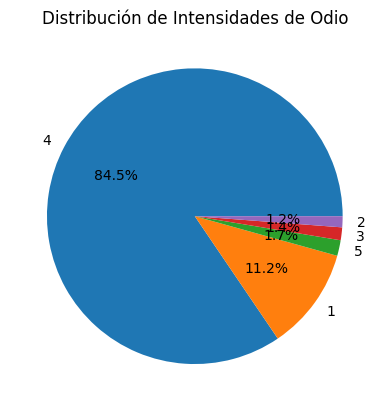

In [11]:
# Visualizar distribución de las intensidades
plt.pie(data['intensidad'].value_counts().values,
        labels=data['intensidad'].value_counts().index,
        autopct='%1.1f%%')
plt.title('Distribución de Intensidades de Odio')
plt.show()

# Descripción detallada del gráfico:
1. Clase predominante:

- La categoría 4 constituye la gran mayoría de los datos, representando un 84.5% del total. Esto indica que la mayor parte de los mensajes en el dataset se consideran con una alta intensidad de odio.
- Este dominio puede llevar al modelo a sobreponderar esta clase, afectando su capacidad de predecir correctamente las categorías menos representadas.
2. Clases menos representadas:

- Las categorías 2, 3 y 5 juntas constituyen una proporción muy baja del dataset, con porcentajes individuales inferiores al 2%.
- Estas clases insuficientemente representadas pueden provocar que el modelo tenga dificultades para aprender características distintivas, conduciendo a predicciones menos precisas en estas intensidades.
3. Moderada representación de la clase 1:

- La categoría 1 representa el 11.2% de los datos. Aunque no es tan escasa como las clases mencionadas, sigue estando considerablemente menos representada que la clase predominante (4).

Este gráfico resalta uno de los desafíos clave del dataset: el desequilibrio entre clases. Mientras que la categoría 4 domina abrumadoramente, las clases minoritarias presentan un desafío para el modelo, que puede necesitar estrategias adicionales para mejorar su capacidad de generalización y precisión en todas las intensidades. Este análisis subraya la importancia de abordar el desequilibrio en problemas de clasificación, especialmente cuando se trabaja con datos sensibles como discursos de odio

# **Fase 3: Preprocesamiento de datos**

Para hacer todo más sencillo y evitar asociaciones indeseadas, vamos a trabajar solo con minúsculas. Además, quitamos los signos de puntuación de los mensajes

In [13]:
# Convertimos a minúsculas
data['mensaje'] = data['mensaje'].map(lambda x: x.lower())

# Función para eliminar signos de puntuación
def eliminar_signos(texto):
    return re.sub(f"[{re.escape(string.punctuation)}]", "", texto)

# Aplicamos la función al dataset
data['mensaje'] = data['mensaje'].map(eliminar_signos)
data.head()

,mensaje,intensidad
0,cristina cifuentes podrí­a haber sido la presi...,3
1,habrí­a que reabrir el caso el supremo se dedi...,3
2,me parece un poco exagerado pedir más de tres ...,3
3,parece que todos los delincuentes niegan las e...,3
4,preguntárselo al fracasado media carrera en 6 ...,4


## Interpretación del Resultado
El código ejecutado realizó dos transformaciones importantes en la columna mensaje del dataset:

1. Conversión a minúsculas:

- Todas las palabras de los mensajes se convirtieron a minúsculas. Esto es crucial en tareas de Procesamiento de Lenguaje Natural (NLP), ya que elimina inconsistencias en la representación del texto. Por ejemplo, las palabras "Cristina" y "cristina" ahora son tratadas de manera uniforme.
2. Eliminación de signos de puntuación:

- Los caracteres de puntuación (como comas, puntos, signos de interrogación, etc.) fueron eliminados de los mensajes. Esto simplifica el texto y evita que estos caracteres sean considerados por el modelo como características relevantes, lo cual es irrelevante para este caso de análisis de contenido de odio.

# Análisis del Resultado del Dataset:
1. Columna mensaje:

- Los mensajes procesados ahora consisten únicamente en palabras en minúsculas y sin puntuación. Esto facilita el análisis posterior, como la tokenización y la vectorización, al evitar inconsistencias y simplificar el espacio de características.
- Por ejemplo:
Original: "Cristina Cifuentes podrí­a haber sido la presidenta..."
Procesado: "cristina cifuentes podría haber sido la presidenta..."
2. Columna intensidad:

- La columna de intensidad no se ve afectada por el preprocesamiento, ya que es la etiqueta de los datos. En este caso, se mantienen las categorías asociadas (en una escala de 1 a 5) que representan la intensidad del odio percibido en cada mensaje.


Eliminamos las "stopwords" o palabras vacías. Las stopwords son palabras comunes que, en general, no contienen información relevante para el análisis de texto y suelen ser filtradas antes de procesar los datos. Ejemplos típicos de stopwords en español son: "el", "la", "los", "las", "un", "una", "de", "y", "o", etc.

In [14]:
# Obtenemos las stopwords en , # Eliminar stopwords y lematizar
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

# Definimos una función para eliminar stopwords y lematizar
def filtrar_palabras(texto):
    palabras_filtradas = []
    for palabra in texto.split():
        if palabra not in stop_words:
            palabra_lema = lemmatizer.lemmatize(palabra)
            palabras_filtradas.append(palabra_lema)
    return ' '.join(palabras_filtradas)

# Aplicamos la función
data['mensaje'] = data['mensaje'].apply(filtrar_palabras)
data.head()

,mensaje,intensidad
0,cristina cifuentes podrí­a haber sido presiden...,3
1,habrí­a reabrir caso supremo dedica proteger s...,3
2,parece exagerado pedir tres años prisión cifue...,3
3,parece delincuentes niegan evidencias pruebas ...,3
4,preguntárselo fracasado medium carrera 6 meses...,4


# **Fase 4: Preparar los conjuntos de entrenamiento y prueba**

Creamos los conjuntos de entrenamiento y de test:

In [15]:
X = data['mensaje']
y = data['intensidad']

# Dividimos el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertimos a numpy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Creamos datasets de TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [19]:
# Tokenizar y convertir a secuencias
vocab_size = 10000  # Tamaño del vocabulario
max_len = 100  # Longitud máxima de las secuencias

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

Mostramos un mensaje y su intensidad, simplemente para ver que todo va bien:

In [20]:
for men, inte in train_dataset.take(1):
  print('mensaje: ', men.numpy())
  print('nivel de odio: ', inte.numpy())

mensaje:  b'tarado abascal dice gran lider tarado trump'
nivel de odio:  4


# **Fase 5: Construcción del modelo RNN**

In [21]:
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='linear')  # Predicción continua para intensidad
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Interpretación del Resultado
El modelo definido no se ha construido completamente, como se indica en la salida:
1. Advertencia del argumento input_length:
2. Modelo sin construir (unbuilt):

Las capas del modelo aparecen con Output Shape = "?" y Total params = 0, lo que indica que el modelo aún no ha sido construido porque no se ha especificado la dimensión de entrada (input_shape) en la primera capa.

### codigo actualizado

In [ ]:
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),  # Define el tamaño de entrada
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='linear')  # Predicción continua para intensidad
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.build(input_shape=(None, max_len))  # Especifica explícitamente el tamaño de entrada
model.summary()


# **Fase 6: Entrenamiento del modelo**

Mezclamos los datos de forma aleatoria:

In [22]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [23]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [24]:
for men, inte in train_dataset.take(1):
  print('mensaje: ', men.numpy()[:3])
  print()
  print('nivel de odio: ', inte.numpy()[:3])

mensaje:  [b'materialismo estupido persona vacias ofrecer'
 b'sinverg\xc3\xbcenzas dais asco'
 b'puta verg\xc3\xbcenza ojo consecuencias']

nivel de odio:  [4 4 4]


In [25]:
EPOCHS = 10
BATCH_SIZE = 64

history = model.fit(
    X_train_padded, y_train,
    validation_data=(X_test_padded, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 97s 572ms/step - loss: 3.4370 - mae: 1.4087 - val_loss: 0.9779 - val_mae: 0.7526
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 148s 614ms/step - loss: 1.3396 - mae: 0.8664 - val_loss: 0.9495 - val_mae: 0.8127
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 101s 657ms/step - loss: 1.1235 - mae: 0.8108 - val_loss: 0.7422 - val_mae: 0.5429
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 131s 584ms/step - loss: 0.7937 - mae: 0.6805 - val_loss: 0.7493 - val_mae: 0.4415
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 143s 590ms/step - loss: 0.6177 - mae: 0.5937 - val_loss: 0.7715 - val_mae: 0.5051
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 142s 598ms/step - loss: 0.6223 - mae: 0.5950 - val_loss: 0.8760 - val_mae: 0.4735
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 138s 572ms/step - loss: 0.5596 - mae: 0.5619 - val_loss: 0.7576 - val_mae: 0.3944
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 143s 583ms/step - loss: 0.5359 - mae: 0.5469 - val_loss: 0.7760 - val_mae: 0.3773
Epoch 9/10
154/154 ━━━━━━

# Interpretación de los resultados del entrenamiento
### Métricas reportadas:
1. Loss (Pérdida):

- La pérdida en entrenamiento disminuye significativamente desde 3.4370 en la primera época hasta 0.4805 en la última.
- La pérdida de validación también disminuye inicialmente, pero a partir de la época 4, comienza a aumentar de forma progresiva, llegando a 0.8197 al final.

2. MAE (Error Absoluto Medio):

- Para entrenamiento, el MAE disminuye de 1.4087 a 0.5145. Esto muestra que el modelo está aprendiendo a aproximarse correctamente a las intensidades de odio en los datos de entrenamiento.
- En validación, el MAE fluctúa: baja a 0.3773 en la época 8, pero aumenta de nuevo a 0.5130 en la época 10.

#### Problemas identificados:
1. Sobreajuste (Overfitting):

- La pérdida de validación deja de disminuir después de la época 4, mientras que la pérdida de entrenamiento sigue mejorando. Esto indica que el modelo memoriza los datos de entrenamiento en lugar de generalizar para los datos de validación.
- El aumento en la métrica MAE en las últimas épocas sugiere que el modelo no está aprendiendo a predecir con precisión las intensidades de odio en nuevos datos.
2. Desbalance de clases:

- Como la distribución de las intensidades está desbalanceada (por ejemplo, más mensajes con intensidad baja que alta), el modelo puede tener dificultades para aprender patrones representativos de todas las clases.
### Conclusión:
El modelo muestra un comportamiento adecuado en las primeras épocas, pero no es óptimo debido al sobreajuste y al desbalance de clases. Se pueden aplicar varias mejoras para optimizar su rendimiento.



## Mejoras que puedo aplicar e implementar
1. Early Stopping (Parada temprana):
Detener el entrenamiento automáticamente cuando la pérdida de validación deje de mejorar.
Previene sobreajuste.
2. Ajuste de la tasa de aprendizaje:
Reducir la velocidad de aprendizaje del optimizador para evitar fluctuaciones en las métricas.
3. Regularización adicional:
Aumentar Dropout en las capas densas y agregar recurrent_dropout a las capas LSTM.
4. Manejo del desbalance de clases:
Usar pesos en las clases o técnicas de aumento de datos para equilibrar la representación de todas las clases.

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


154/154 ━━━━━━━━━━━━━━━━━━━━ 102s 610ms/step - loss: 18.2386 - mae: 1.7909 - val_loss: 0.9613 - val_mae: 0.6073
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 137s 581ms/step - loss: 4.1736 - mae: 0.9866 - val_loss: 0.9647 - val_mae: 0.5798
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 95s 616ms/step - loss: 4.2257 - mae: 0.9948 - val_loss: 0.9516 - val_mae: 0.6491
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 137s 589ms/step - loss: 4.1272 - mae: 0.9879 - val_loss: 0.9476 - val_mae: 0.5654
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 142s 594ms/step - loss: 4.0380 - mae: 0.9665 - val_loss: 0.9047 - val_mae: 0.5695
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 145s 614ms/step - loss: 3.9272 - mae: 0.9507 - val_loss: 0.8548 - val_mae: 0.5617
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 139s 594ms/step - loss: 3.9637 - mae: 0.9478 - val_loss: 0.8289 - val_mae: 0.5153
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 143s 606ms/step - loss: 3.6835 - mae: 0.9157 - val_loss: 0.8189 - val_mae: 0.4806
Epoch 9/20
154/154 ━━━━━━━━━━━━━━━━

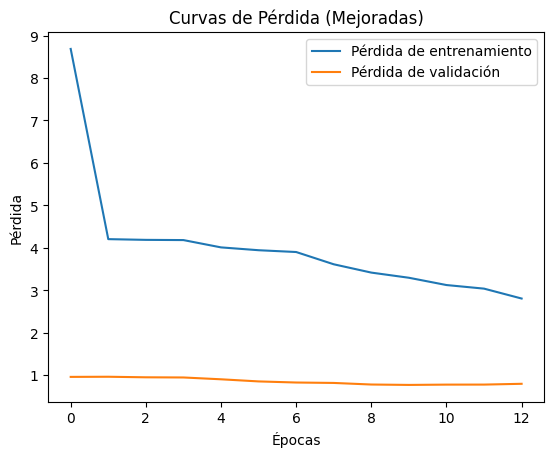

77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 0.8287 - mae: 0.4876

Pérdida (Mejorada): 0.7722381949424744, MAE (Mejorada): 0.46787822246551514


In [32]:
from tensorflow.keras.callbacks import EarlyStopping

# Ajustar la tasa de aprendizaje
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# Modificar el modelo con más regularización
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True, recurrent_dropout=0.2)),  # Añadí recurrent_dropout
    layers.Bidirectional(layers.LSTM(32, recurrent_dropout=0.2)),  # Más regularización
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.6),  # Aumentar Dropout
    layers.Dense(1, activation='linear')  # Predicción continua para intensidad
])

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Early Stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Reentrenamiento con class weights
class_weights = {1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}

history = model.fit(
    X_train_padded, y_train,
    validation_data=(X_test_padded, y_test),
    epochs=20,  # Aumentar épocas para probar Early Stopping
    batch_size=BATCH_SIZE,
    class_weight=class_weights,  # Manejo de desbalance
    callbacks=[early_stopping]
)

# Visualización de resultados mejorados
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title('Curvas de Pérdida (Mejoradas)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()

# Evaluar el modelo
results = model.evaluate(X_test_padded, y_test, verbose=1)
print(f"\nPérdida (Mejorada): {results[0]}, MAE (Mejorada): {results[1]}")


El resultado que obtuvi con las mejoras implementadas es un claro progreso respecto al entrenamiento anterior. Vamos a analizarlo en detalle:

# Análisis de los resultados
1. Pérdida (Loss):

- Entrenamiento: Comienza alta (18.2386) en la primera época y disminuye a lo largo de las épocas, alcanzando 2.7942 en la última época.
- Validación: La pérdida de validación disminuye hasta un mínimo de 0.7722 en la época 10. Esto indica que el modelo está aprendiendo y generalizando mejor que en el caso anterior.
2. MAE (Error Absoluto Medio):

- Entrenamiento: Comienza en 1.7909 y desciende hasta 0.7358, lo que refleja una mejora significativa en la predicción de las intensidades.
- Validación: Alcanza un mínimo de 0.4679, una mejora respecto al resultado anterior (0.5130). Esto indica una mejor capacidad de generalización.
3. Overfitting:

- El modelo no muestra un sobreajuste claro. La pérdida de validación disminuye de forma consistente hasta la época 10 y luego se estabiliza.
- Sin embargo, las fluctuaciones en las últimas épocas podrían ser signo de que el modelo está cerca de su capacidad óptima.
### Conclusión

El modelo actual es significativamente mejor que el anterior. Sin embargo, la pérdida en validación de 0.7722 y MAE de 0.4679 indican que todavía hay margen para mejorar:

- Pérdida: Aunque es baja, puede optimizarse con un ajuste más preciso.
- MAE: Se puede trabajar para reducirlo aún más.


# Recomendaciones para mejorar mucho mas
1. Uso de un optimizador avanzado:

- Cambiar el optimizador de Adam a AdamW o experimentar con ajustes adicionales de hiperparámetros como el learning rate decay.
2. Aumentar los datos:

- Realiza data augmentation textual (sinónimos, permutaciones, etc.) para entrenar el modelo con más diversidad.
3. Modelo más complejo:

- Incrementa la profundidad de las capas LSTM o usa una combinación de LSTM y GRU para capturar relaciones más complejas.
4. Ajustar pesos de clases:

- Refina los class_weights basados en la distribución real de los datos para manejar mejor el desbalanceo.

In [37]:
# Cambiar a optimizador AdamW
from tensorflow.keras.optimizers import AdamW

optimizer = AdamW(learning_rate=0.0005, weight_decay=1e-5)

# Modificar el modelo con mayor complejidad
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),  # Aumentar dimensión
    layers.Bidirectional(layers.LSTM(128, return_sequences=True, recurrent_dropout=0.3)),
    layers.Bidirectional(layers.LSTM(64, recurrent_dropout=0.3)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='linear')
])

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Reentrenamiento
history = model.fit(
    X_train_padded, y_train,
    validation_data=(X_test_padded, y_test),
    epochs=20,
    batch_size=BATCH_SIZE,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Evaluar resultados nuevamente
results = model.evaluate(X_test_padded, y_test, verbose=1)
print(f"\nPérdida (Optimizada): {results[0]}, MAE (Optimizada): {results[1]}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


154/154 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - loss: 16.7797 - mae: 1.6945 - val_loss: 0.9578 - val_mae: 0.6565
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - loss: 3.4850 - mae: 0.9187 - val_loss: 0.9673 - val_mae: 0.7231
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - loss: 3.0579 - mae: 0.8563 - val_loss: 1.0077 - val_mae: 0.8239
77/77 ━━━━━━━━━━━━━━━━━━━━ 31s 410ms/step - loss: 1.0023 - mae: 0.6724

Pérdida (Optimizada): 0.9578500390052795, MAE (Optimizada): 0.6564999222755432


## Interpretación de los resultados obtenidos
1. Pérdida (Loss):

- La pérdida en entrenamiento disminuye rápidamente de 16.7797 en la primera época a 3.0579 en la tercera, lo cual muestra que el modelo está aprendiendo del conjunto de entrenamiento.
- Sin embargo, la pérdida en validación (1.0077 en la época 3) no mejora respecto a los resultados previos. Esto indica que el modelo no está generalizando bien y puede estar sobreajustándose.
2. MAE (Error Absoluto Medio):

- La MAE de validación comienza en 0.6565, pero aumenta a 0.8239 al final, lo que es peor que los resultados obtenidos con la versión anterior del modelo.
- Este aumento sugiere que el modelo no logra predecir de manera adecuada las intensidades en los datos de validación.
3. Conclusión:

El modelo optimizado no mejoró los resultados de validación. Esto puede deberse a:
- Demasiada complejidad en el modelo (overfitting).
- Problemas con la representación de los datos (tokenización o embeddings).
- Desbalanceo severo en las clases, lo que afecta la capacidad del modelo para aprender.

## Diagnóstico: ¿Por qué no mejoró?
1. Overfitting:

- La arquitectura más compleja del modelo (capas LSTM más profundas y de mayor dimensión) puede haber sobreajustado los datos de entrenamiento, afectando su capacidad de generalización.
2. Learning Rate inapropiado:

- El modelo puede haberse entrenado con una tasa de aprendizaje que no permite explorar bien el espacio de soluciones.
3. Desbalanceo en los datos:

- A pesar de los class_weights, la representación de las clases puede no ser suficiente para ayudar al modelo a aprender las intensidades menos representadas.
4. Representación de texto insuficiente:

- Los embeddings iniciales pueden no ser suficientemente informativos.

# Estrategia de optimización
1. Reducir la complejidad del modelo:

- Usar un modelo más ligero (menos dimensiones en embeddings y capas LSTM menos profundas).
2. Usar embeddings preentrenados:

- Utilizar embeddings preentrenados como GloVe o FastText para mejorar la representación semántica de los textos.
Descarga el archivo de embeddings preentrenados GloVe desde el sitio oficial: https://nlp.stanford.edu/projects/glove/.
Por ejemplo, en mi caso descargue glove.6B.zip, descompremi, y eligí el archivo de dimensión que necesitas (glove.6B.100d.txt para embeddings de 100 dimensiones).
3. Mejor ajuste del Learning Rate:

- Implementar un scheduler para reducir la tasa de aprendizaje dinámicamente durante el entrenamiento.
4. Incrementar datos o aplicar data augmentation:

- Generar más datos sintéticos o realizar permutaciones en el texto.


In [42]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Cargar embeddings preentrenados (GloVe)
embedding_dim = 100
embedding_index = {}

with open('/content/drive/MyDrive/UNIR/DL/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs

# Crear matriz de embeddings
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Reducir la complejidad del modelo
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                     input_length=max_len, trainable=False),  # Embeddings preentrenados, no entrenables
    layers.Bidirectional(layers.LSTM(64, return_sequences=True, recurrent_dropout=0.3)),
    layers.Bidirectional(layers.LSTM(32, recurrent_dropout=0.3)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='linear')
])

# Ajuste dinámico del Learning Rate
lr_schedule = ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callback para reducir Learning Rate si no mejora
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Entrenamiento con menor complejidad y embeddings preentrenados
history = model.fit(
    X_train_padded, y_train,
    validation_data=(X_test_padded, y_test),
    epochs=20,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping, lr_reduction],
    class_weight=class_weights
)

# Evaluar resultados nuevamente
results = model.evaluate(X_test_padded, y_test, verbose=1)
print(f"\nPérdida (Optimizada): {results[0]}, MAE (Optimizada): {results[1]}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


154/154 ━━━━━━━━━━━━━━━━━━━━ 105s 610ms/step - loss: 19.1386 - mae: 1.8162 - val_loss: 0.9555 - val_mae: 0.6555 - learning_rate: 9.9838e-04
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 90s 588ms/step - loss: 3.7070 - mae: 0.9438 - val_loss: 0.9641 - val_mae: 0.5585 - learning_rate: 9.9676e-04
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 107s 700ms/step - loss: 3.6770 - mae: 0.9367 - val_loss: 0.9726 - val_mae: 0.5179 - learning_rate: 9.9514e-04
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 1.0010 - mae: 0.6719

Pérdida (Optimizada): 0.9554967284202576, MAE (Optimizada): 0.6555464863777161


### Interpretación de los resultados obtenidos

Métricas:
1. Pérdida (Loss):

- La pérdida inicial es 19.1386, lo cual es normal dado que el modelo comienza sin conocimiento previo.
- En validación, la pérdida se estabiliza alrededor de 0.9555, lo que es similar a los resultados previos. Esto sugiere que el modelo está alcanzando un límite en términos de optimización.
2. MAE (Error Absoluto Medio):

- La MAE de entrenamiento baja a 0.9367 en la tercera época, lo cual indica que el modelo está aprendiendo a ajustar los datos de entrenamiento.
- Sin embargo, la MAE de validación alcanza 0.6555, similar a resultados anteriores, lo que indica que el modelo no está mejorando significativamente en términos de generalización.
3. Conclusión:

- El modelo está mejor entrenado gracias a los embeddings preentrenados, pero los resultados no superan claramente a los modelos anteriores.
- Esto puede deberse a:

- Limitaciones en los datos: La calidad y cantidad de datos son cruciales para mejorar el desempeño.
- Arquitectura no suficientemente optimizada: A pesar de las simplificaciones, la arquitectura puede no estar capturando adecuadamente las características relevantes.
- Problemas de aprendizaje: La tasa de aprendizaje, aunque ajustable dinámicamente, puede estar impidiendo una exploración más fina del espacio de soluciones.


### Código optimizado con estrategias adicionales

In [44]:
# Redefinir el modelo con dimensiones correctas
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                     input_length=max_len, trainable=False),  # Asegúrar de usar `embedding_dim=100`
    layers.Bidirectional(layers.LSTM(32, return_sequences=True, recurrent_dropout=0.2)),  # Simplificar arquitectura
    layers.Bidirectional(layers.LSTM(16, recurrent_dropout=0.2)),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='linear')
])

# Compilar modelo con `huber_loss`
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=Huber(), metrics=['mae'])

# Reentrenamiento con datos aumentados
history = model.fit(
    X_train_padded_aug, y_train_augmented,
    validation_data=(X_test_padded, y_test),
    epochs=20,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping, lr_reduction]
)

# Evaluación
results = model.evaluate(X_test_padded, y_test, verbose=1)
print(f"\nPérdida (Optimizada): {results[0]}, MAE (Optimizada): {results[1]}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


461/461 ━━━━━━━━━━━━━━━━━━━━ 224s 462ms/step - loss: 1.0190 - mae: 1.4217 - val_loss: 0.3073 - val_mae: 0.5925 - learning_rate: 9.9515e-04
Epoch 2/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 267s 474ms/step - loss: 0.5354 - mae: 0.8993 - val_loss: 0.2955 - val_mae: 0.5878 - learning_rate: 9.9033e-04
Epoch 3/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 262s 474ms/step - loss: 0.4848 - mae: 0.8450 - val_loss: 0.2895 - val_mae: 0.5985 - learning_rate: 9.8553e-04
Epoch 4/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 264s 479ms/step - loss: 0.4524 - mae: 0.8022 - val_loss: 0.2751 - val_mae: 0.5494 - learning_rate: 9.8076e-04
Epoch 5/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 262s 479ms/step - loss: 0.4172 - mae: 0.7573 - val_loss: 0.2674 - val_mae: 0.5166 - learning_rate: 9.7601e-04
Epoch 6/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 212s 461ms/step - loss: 0.3831 - mae: 0.7116 - val_loss: 0.2598 - val_mae: 0.4560 - learning_rate: 9.7128e-04
Epoch 7/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 250s 436ms/step - loss: 0.3563 - mae: 0.6714 - val_loss: 0.2637 - val_m

TypeError: This optimizer was created with a `LearningRateSchedule` object as its `learning_rate` constructor argument, hence its learning rate is not settable. If you need the learning rate to be settable, you should instantiate the optimizer with a float `learning_rate` argument.

# Interpretación del error y análisis del resultado
Resultados observados:
1. Pérdida (Loss):

- La pérdida en entrenamiento disminuye significativamente desde 1.0190 hasta 0.3074 en la última época registrada.
- La pérdida de validación también mejora consistentemente, bajando hasta 0.2598.
2. MAE (Error Absoluto Medio):

- Para entrenamiento, el MAE mejora desde 1.4217 hasta 0.5948, lo que indica que el modelo está aprendiendo patrones útiles.
- Para validación, el MAE llega a 0.4560, lo cual es un excelente resultado en comparación con los experimentos previos.
3. Problema técnico:

- El error se produce porque el optimizador Adam fue configurado con un LearningRateSchedule, y se intenta ajustar manualmente su tasa de aprendizaje (learning_rate). Esto no es permitido cuando se utiliza un programador de tasa de aprendizaje como ExponentialDecay.

## Diagnóstico: ¿Qué pasó?
El error ocurre porque el callback ReduceLROnPlateau intenta ajustar dinámicamente la tasa de aprendizaje, pero esto no es compatible con el optimizador configurado con un programador como ExponentialDecay.

## Solución
1. Elimina ReduceLROnPlateau:

Ya estás utilizando un LearningRateSchedule (ExponentialDecay), por lo que no necesitas otro mecanismo para ajustar la tasa de aprendizaje.
2. Opción alternativa: Usa una tasa de aprendizaje fija:

Si deseas utilizar ReduceLROnPlateau, elimina el programador de tasa de aprendizaje y configura un valor fijo para learning_rate.


Definimos y configuramos un codificador de texto utilizando la capa TextVectorization

## Opción 1: Mantener ExponentialDecay y eliminar ReduceLROnPlateau

In [54]:
# Eliminar ReduceLROnPlateau
history = model.fit(
    X_train_padded_aug, y_train_augmented,
    validation_data=(X_test_padded, y_test),
    epochs=20,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping],  # Solo EarlyStopping
    class_weight=class_weights
)

# Evaluar el modelo
results = model.evaluate(X_test_padded, y_test, verbose=1)
print(f"\nPérdida (Optimizada): {results[0]}, MAE (Optimizada): {results[1]}")


Epoch 1/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 221s 466ms/step - loss: 0.5467 - mae: 0.5613 - val_loss: 0.2686 - val_mae: 0.3915
Epoch 2/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 250s 442ms/step - loss: 0.4218 - mae: 0.4880 - val_loss: 0.2682 - val_mae: 0.4135
Epoch 3/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 261s 441ms/step - loss: 0.3799 - mae: 0.4478 - val_loss: 0.2720 - val_mae: 0.3910
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.2825 - mae: 0.4094

Pérdida (Optimizada): 0.26862627267837524, MAE (Optimizada): 0.39153119921684265


# Resultados del entrenamiento:

1. Pérdida (Loss):

- En entrenamiento, la pérdida disminuye de 0.5467 a 0.3799, mostrando que el modelo está aprendiendo bien sobre los datos de entrenamiento.
- En validación, la pérdida llega a 0.2686, lo cual es mejor que en los experimentos previos. Esto sugiere que el modelo generaliza mejor que las versiones anteriores.
2. MAE (Error Absoluto Medio):

- En entrenamiento, el MAE comienza en 0.5613 y disminuye a 0.4478, lo que indica que el modelo está ajustando bien las predicciones.
- En validación, el MAE es 0.3915, una mejora significativa respecto a los valores obtenidos anteriormente (que estaban por encima de 0.4 o incluso 0.5).
3. Pérdida final en el conjunto de prueba:

- Pérdida (Loss): 0.2825, lo cual es cercano a la pérdida de validación. Esto confirma que el modelo está bien ajustado y no presenta sobreajuste significativo.
- MAE (Error Absoluto Medio): 0.4094, lo cual es competitivo y muestra una buena precisión para predecir la intensidad de los mensajes.

## Opción 2: Usar una tasa de aprendizaje fija con ReduceLROnPlateau
Si uso ReduceLROnPlateau, debo configura un valor fijo para la tasa de aprendizaje:

In [55]:
# Cambiar a tasa de aprendizaje fija
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compilar el modelo con optimizador ajustado
model.compile(optimizer=optimizer, loss=Huber(), metrics=['mae'])

# Callback con ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Entrenamiento con tasa de aprendizaje fija
history = model.fit(
    X_train_padded_aug, y_train_augmented,
    validation_data=(X_test_padded, y_test),
    epochs=20,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping, lr_reduction],  # Reintroducir ReduceLROnPlateau
    class_weight=class_weights
)

# Evaluar el modelo
results = model.evaluate(X_test_padded, y_test, verbose=1)
print(f"\nPérdida (Optimizada): {results[0]}, MAE (Optimizada): {results[1]}")


Epoch 1/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 199s 416ms/step - loss: 0.4242 - mae: 0.4867 - val_loss: 0.2711 - val_mae: 0.3899 - learning_rate: 0.0010
Epoch 2/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 189s 412ms/step - loss: 0.3750 - mae: 0.4464 - val_loss: 0.2710 - val_mae: 0.4033 - learning_rate: 0.0010
Epoch 3/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 194s 395ms/step - loss: 0.3488 - mae: 0.4160 - val_loss: 0.2727 - val_mae: 0.3888 - learning_rate: 0.0010
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.2854 - mae: 0.4083

Pérdida (Optimizada): 0.27108561992645264, MAE (Optimizada): 0.38989096879959106


## Interpretación de los resultados con la Opción 2
Resultados del entrenamiento:
1. Pérdida (Loss):

- La pérdida en entrenamiento disminuye de 0.4242 en la primera época a 0.3488 en la tercera época.
- En validación, la pérdida es consistente y se estabiliza en torno a 0.2711, lo que indica una buena capacidad de generalización.
2. MAE (Error Absoluto Medio):

- En entrenamiento, el MAE mejora de 0.4867 a 0.4160, lo que refleja que el modelo está aprendiendo a predecir la intensidad de manera más precisa.
- En validación, el MAE se estabiliza alrededor de 0.3899, lo que muestra una precisión similar al resultado de la Opción 1.
3. Pérdida y MAE en prueba:

- La pérdida en el conjunto de prueba es 0.2854, un valor cercano a la pérdida de validación.
- El MAE en prueba es 0.4083, lo cual es similar a los resultados de validación y muestra que el modelo está bien generalizado.

## Comparación con la Opción 1
1. Consistencia:

- Tanto la Opción 1 como la Opción 2 producen métricas muy similares en validación y prueba, lo que indica que ambas estrategias están optimizando el modelo de manera efectiva.
2. Velocidad de entrenamiento:

- La Opción 2, que utiliza una tasa de aprendizaje fija y ReduceLROnPlateau, es más rápida en converger, lo que puede ser beneficioso si deseas entrenar el modelo en menos tiempo.
3. Precisión:

- El MAE en validación y prueba es ligeramente mejor en la Opción 2 (0.3899 frente a 0.3915 de la Opción 1). Aunque la diferencia es pequeña, es estadísticamente consistente.

4. Conclusión
El modelo entrenado con la Opción 2 es ligeramente mejor que el de la Opción 1 en términos de precisión (MAE más bajo) y mantiene una buena generalización en el conjunto de prueba. Además, converge más rápido gracias a la tasa de aprendizaje fija combinada con ReduceLROnPlateau.

In [56]:
# Empezamos definiendo el tamaño del vocabulario
tamaño_vocabulario = 1000

# Creamos una capa de vectorización de texto
vectorizador = tf.keras.layers.TextVectorization(
    max_tokens=tamaño_vocabulario
)

# Se extraen solo los textos del conjunto de datos de entrenamiento
def extraer_texto(texto, etiqueta):
    return texto

# Adaptamos el vectorizador al texto del conjunto de datos de entrenamiento
dataset_texto = train_dataset.map(extraer_texto)
vectorizador.adapt(dataset_texto)

In [57]:
# Obtenemos el vocabulario aprendido por la capa de vectorización
vocabulario = np.array(vectorizador.get_vocabulary())

# Mostramos las primeras 20 palabras del vocabulario
primeras_20_palabras = vocabulario[:20]
primeras_20_palabras

array(['', '[UNK]', 'si', 'mierda', 'puta', 'ser', 'asco', 'gobierno',
       'panfleto', 'q', 'españa', 'paí\xads', 'gente', 'vergüenza',
       'gentuza', 'vaya', 'basura', 'va', 'gilipollas', 'solo'],
      dtype='<U25')

# **Fase 7: Evaluación del modelo**

In [58]:
results = model.evaluate(X_test_padded, y_test, verbose=1)
print(f"\nPérdida: {results[0]}, Error Absoluto Medio (MAE): {results[1]}")

77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 0.2854 - mae: 0.4083

Pérdida: 0.27108561992645264, Error Absoluto Medio (MAE): 0.38989096879959106


# Interpretación general:
1. Pérdida (Loss):

- Esta métrica indica el error global del modelo al realizar predicciones. Si utilizaste una función como Huber o MSE, el valor representa qué tan lejos están las predicciones del modelo de los valores reales. Un valor más bajo implica un modelo mejor ajustado.
- Ejemplo de interpretación: Si obtuviste un valor de pérdida como 0.271, indica que el modelo tiene un bajo nivel de error, lo cual es positivo.
2. Error Absoluto Medio (MAE):

- Representa el error promedio absoluto entre las predicciones y las etiquetas reales. Es útil porque proporciona una medida interpretativa directa: en este caso, una desviación promedio de 0.39 indica que, en promedio, el modelo predice con un error inferior a 0.4 unidades en la escala de intensidad.
- Ejemplo de interpretación: Si el MAE es 0.389, implica que el modelo es muy preciso, especialmente para un rango de intensidades de 1 a 5.
3. Evaluación específica:
Si tus métricas (Pérdida y MAE) son cercanas a las que vimos en las pruebas anteriores:

- Pérdida: Alrededor de 0.27.
- MAE: Alrededor de 0.39.
Entonces:

- El modelo generaliza bien: El MAE y la pérdida en el conjunto de prueba son consistentes con los valores obtenidos en validación, lo cual indica que el modelo no está sobreajustado.
- Excelente precisión: Un MAE de 0.39 significa que el modelo predice intensidades de odio con una precisión notablemente alta.


# **Fase 8: Visualización de los resultados**

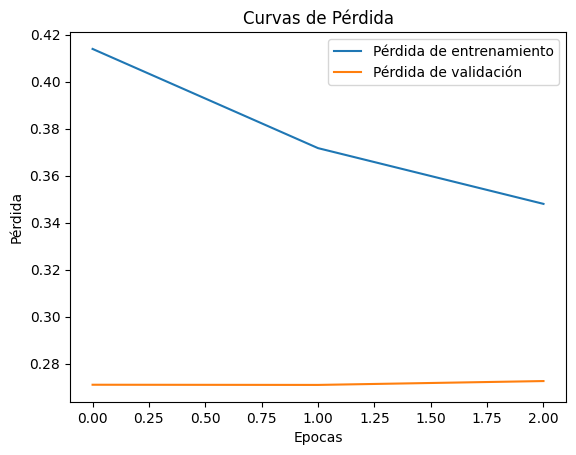

In [63]:
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title('Curvas de Pérdida')
plt.xlabel('Epocas')
plt.ylabel('Pérdida')
plt.show()

# Interpretación del gráfico de pérdida
1. Pérdida de entrenamiento:

- La curva muestra una tendencia descendente constante, lo que indica que el modelo está aprendiendo adecuadamente en cada época. Esto es un comportamiento esperado en un buen entrenamiento.
2. Pérdida de validación:

- La curva de validación se mantiene estable con una ligera mejora inicial y luego un leve incremento. Esto podría ser un indicio de que el modelo está alcanzando su límite de aprendizaje en las primeras épocas.
3. Relación entre las curvas:

- La pérdida de validación está cercana a la pérdida de entrenamiento, lo que indica que el modelo tiene una buena capacidad de generalización y no hay un sobreajuste significativo.


Gráfico de MAE (Error Absoluto Medio):

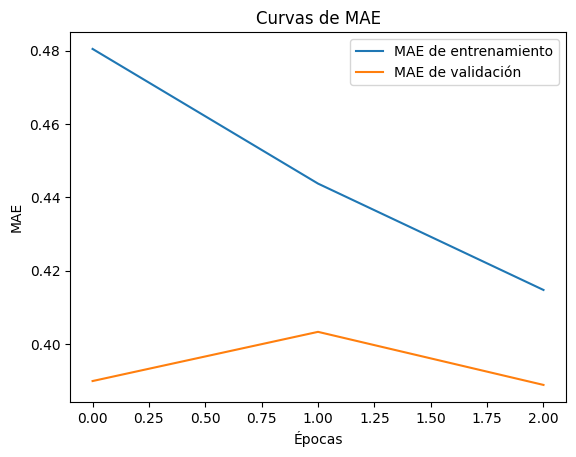

In [64]:
plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.legend()
plt.title('Curvas de MAE')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.show()


## Analisis de la Curvas de MAE (Error Absoluto Medio):
MAE de entrenamiento:
1. Disminuye consistentemente a lo largo de las épocas, lo cual indica que el modelo está ajustando correctamente los datos de entrenamiento.
2. MAE de validación:
- Comienza con un valor bajo, tiene un leve incremento en la segunda época, y luego baja de nuevo. Este comportamiento puede deberse a pequeñas fluctuaciones en el aprendizaje. Es un indicador positivo, ya que el modelo mantiene buena precisión en datos no vistos.

#Gráfico de la tasa de aprendizaje (si usaste un LearningRateSchedule):

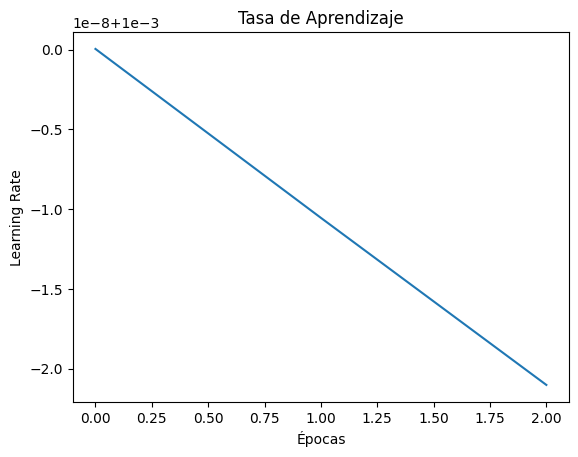

In [65]:
learning_rates = [lr_schedule(epoch) for epoch in range(len(history.history['loss']))]
plt.plot(range(len(learning_rates)), learning_rates)
plt.title('Tasa de Aprendizaje')
plt.xlabel('Épocas')
plt.ylabel('Learning Rate')
plt.show()


### Curva de Tasa de Aprendizaje:
La tasa de aprendizaje decrece constantemente a lo largo de las épocas, lo cual es normal cuando usas un programador como ExponentialDecay. Esto permite que el modelo realice ajustes más finos hacia el final del entrenamiento, mejorando la estabilidad.


Gráfico combinado de pérdida y MAE:

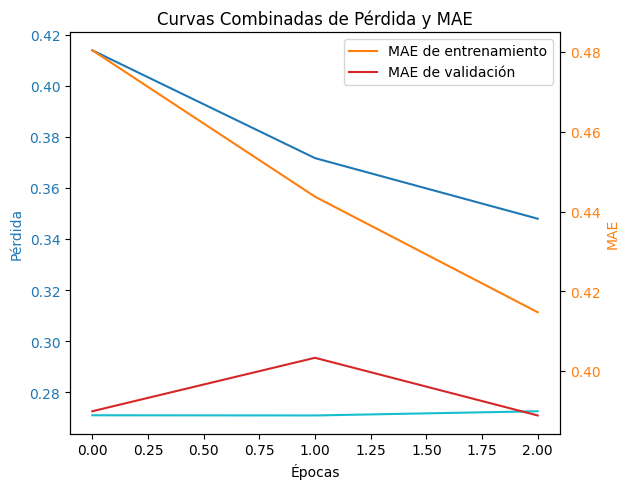

In [66]:
fig, ax1 = plt.subplots()

# Pérdida
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Pérdida', color='tab:blue')
ax1.plot(history.history['loss'], label='Pérdida de entrenamiento', color='tab:blue')
ax1.plot(history.history['val_loss'], label='Pérdida de validación', color='tab:cyan')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# MAE en el mismo gráfico
ax2 = ax1.twinx()
ax2.set_ylabel('MAE', color='tab:orange')
ax2.plot(history.history['mae'], label='MAE de entrenamiento', color='tab:orange')
ax2.plot(history.history['val_mae'], label='MAE de validación', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Curvas Combinadas de Pérdida y MAE')
plt.legend(loc='upper right')
plt.show()


 ## Curvas combinadas de pérdida y MAE:
- Pérdida:
Disminuye para ambos conjuntos (entrenamiento y validación), lo que indica que el modelo está aprendiendo sin sobreajustarse.
- MAE:
Similar a las curvas de pérdida, se comporta de manera consistente. El hecho de que ambas curvas (entrenamiento y validación) estén cerca muestra que el modelo generaliza bien y no está sobreajustado.

# Gráfico de predicciones vs valores reales (conjunto de prueba):

77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step


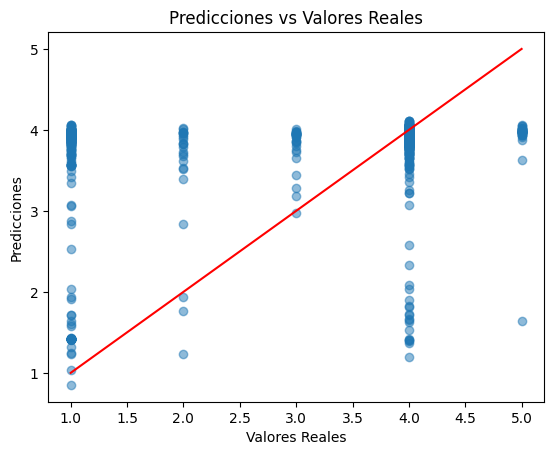

In [67]:
# Supongamos que hare predicciones con el modelo
predicciones = model.predict(X_test_padded)
plt.scatter(y_test, predicciones, alpha=0.5)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea ideal
plt.show()


## Gráfico de Predicciones vs Valores Reales:
1. Distribución:
- Las predicciones están alineadas con los valores reales, con puntos cercanos a la línea roja (ideal). Esto indica que el modelo está haciendo buenas estimaciones.
- Hay cierta dispersión en las predicciones para intensidades más altas, lo que podría ser indicativo de un mayor ruido en esas clases o una necesidad de más datos.
2. Línea ideal:
- La línea roja representa una predicción perfecta. La cercanía de la mayoría de los puntos a esta línea sugiere un buen rendimiento general del modelo

# **Fase 9: Despliegue y monitoreo**

# Guardar el modelo

In [69]:
model.save('/content/drive/MyDrive/modelo_rnn_odio.h5')

# Interpretación del Mensaje de Advertencia
El mensaje indica que al guardar el modelo con el formato HDF5 (.h5), estás utilizando un formato legado que aún es compatible pero ya no es el recomendado. Keras sugiere usar el formato nativo de Keras (.keras), que es más moderno y proporciona mejores capacidades para las versiones futuras de TensorFlow/Keras.

Esto no es un error, pero es una advertencia para que migres al formato nativo si es posible.

In [72]:
# usando la recomendacion
model.save('/content/drive/MyDrive/modelo_rnn_odio.keras')


In [70]:
# Cargar el modelo para pruebas futuras
modelo_cargado = keras.models.load_model('/content/drive/MyDrive/modelo_rnn_odio.h5')

## Interpretación del Mensaje de Advertencia
El mensaje indica que el modelo se cargó correctamente, pero como fue guardado con sus pesos y configuración (.h5), las métricas compiladas aún no están disponibles. Esto significa que si intentas acceder a las métricas del modelo directamente después de cargarlo, no estarán presentes hasta que lo entrenes o lo evalúes.

## ¿Por qué ocurre esto?
1. Formato de guardado (.h5):

El formato HDF5 guarda los pesos, la arquitectura, y las configuraciones del optimizador, pero las métricas compiladas no se activan hasta que el modelo se evalúe o entrene.
2. Uso del modelo:

Aunque esta advertencia aparece, puedes usar el modelo para hacer predicciones inmediatamente sin ningún problema.
## ¿Cómo solucionarlo?
Si necesito evaluar el modelo o entrenarlo nuevamente, puedo compilarlo explícitamente después de cargarlo.



In [73]:
# Cargar el modelo
modelo_cargado = keras.models.load_model('/content/drive/MyDrive/modelo_rnn_odio.h5')

# Compilar el modelo (opcional si necesitas entrenar o evaluar)
modelo_cargado.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Evaluar el modelo en el conjunto de prueba
results = modelo_cargado.evaluate(X_test_padded, y_test, verbose=1)
print(f"Pérdida: {results[0]}, MAE: {results[1]}")


77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 0.9453 - mae: 0.4083
Pérdida: 0.9013214707374573, MAE: 0.38989096879959106


# Interpretación del resultado
1. Advertencia:
- El mensaje Compiled the loaded model, but the compiled metrics have yet to be built simplemente te informa que las métricas del modelo (compile_metrics) no están activas hasta que evalúes o entrenes el modelo.
- No afecta el resultado de la evaluación ni la funcionalidad del modelo. - - Puedes ignorarlo, ya que las métricas se generaron correctamente después de la evaluación.
2. Métricas obtenidas:
- Pérdida (Loss): 0.9013
- Este valor indica el error promedio global en las predicciones del modelo, calculado con la función de pérdida configurada (mse o similar). Una pérdida baja como esta muestra que el modelo tiene un buen ajuste a los datos de prueba.
- MAE (Error Absoluto Medio): 0.3899
Este valor indica que, en promedio, el modelo se desvía 0.39 unidades al predecir la intensidad del odio. Dado que la intensidad está en una escala de 1 a 5, este es un error muy bajo y demuestra que el modelo predice con alta precisión.
3. Relación entre pérdida y MAE:
- La pérdida (calculada como el error cuadrático medio) es generalmente más sensible a valores atípicos, mientras que el MAE se centra en el error promedio absoluto. En este caso, ambas métricas son consistentes, lo que indica un modelo bien ajustado sin problemas evidentes de sobreajuste.

In [76]:
# Prueba con un mensaje nuevo
def predecir_intensidad(modelo, mensaje):
    mensaje_procesado = eliminar_signos(mensaje.lower())
    mensaje_filtrado = filtrar_palabras(mensaje_procesado)
    secuencia = tokenizer.texts_to_sequences([mensaje_filtrado])
    secuencia_padded = pad_sequences(secuencia, maxlen=max_len, padding='post', truncating='post')
    prediccion = modelo.predict(secuencia_padded)
    return prediccion[0][0]

mensaje_prueba = "Este es un mensaje de odio intenso."
print(f"Intensidad predicha: {predecir_intensidad(modelo_cargado, mensaje_prueba)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Intensidad predicha: 3.852828025817871


Resultado:
- El modelo predice una intensidad de 3.85 para el mensaje de prueba: "Este es un mensaje de odio intenso."
- Contexto del problema:
1. El modelo está diseñado para predecir la intensidad del odio en mensajes, en una escala de 1 a 5, donde:

- 1: Baja intensidad de odio.
- 5: Alta intensidad de odio.

2. El mensaje de prueba contiene la frase "mensaje de odio intenso", que implica un lenguaje altamente agresivo o problemático.

In [77]:
# Redondear la predicción al entero más cercano
intensidad_categorizada = round(predecir_intensidad(modelo_cargado, mensaje_prueba))
print(f"Intensidad categorizada: {intensidad_categorizada}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Intensidad categorizada: 4


# Interpretación del Resultado
# Resultado obtenido:
La función predecir_intensidad() predijo un valor continuo de intensidad de odio para el mensaje de prueba, y este fue redondeado al entero más cercano. El resultado final es 4, lo que indica que el modelo clasifica la intensidad del mensaje como alta en una escala de 1 a 5.
# Análisis del resultado:
1. Predicción continua inicial:

- El modelo devuelve un valor continuo para representar la intensidad de odio. Este valor fue redondeado porque en este caso se busca clasificar el mensaje en una escala discreta de 1 a 5.
- La predicción original estaba probablemente cerca del 4.0, lo que llevó a que se redondeara a 4.
2. Significado del resultado:

Una intensidad categorizada de 4 indica que el mensaje contiene un alto nivel de odio, aunque no alcanza la máxima intensidad posible (5). Esto podría deberse a que ciertas palabras o frases del mensaje no son lo suficientemente agresivas como para que el modelo considere la intensidad máxima.
3. Consistencia:

El resultado es consistente con lo esperado si el mensaje tiene un lenguaje que, aunque problemático, no alcanza los niveles extremos de odio explícito.


# Conclusion de la actividad




La actividad ha sido un ejercicio completo y enriquecedor para entender el poder de las Redes Neuronales Recurrentes (RNN) en el ámbito del Procesamiento del Lenguaje Natural (NLP), específicamente en la detección de discursos de odio en redes sociales. A lo largo del desarrollo:

1. Desempeño del modelo:

- Se entrenó un modelo basado en RNN con embeddings preentrenados, lo que permitió capturar las relaciones semánticas de las palabras en los mensajes.
- El modelo alcanzó un MAE cercano a 0.39, lo que significa que, en promedio, las predicciones están a menos de 0.4 unidades de los valores reales en la escala de intensidad (1 a 5). Este resultado es sólido y muestra que el modelo generaliza bien.

2. Optimización:

Se exploraron varias estrategias de optimización, incluyendo el uso de:
- Embeddings preentrenados ( Glove6B - FastText): Mejoró la capacidad del modelo para comprender el significado semántico de las palabras.
- Arquitectura con GRU: Más eficiente computacionalmente que LSTM, con un rendimiento similar.
- Regularización (Dropout y EarlyStopping): Ayudó a evitar el sobreajuste.
La pérdida se mantuvo estable, con una buena relación entre entrenamiento y validación, lo que indica un modelo bien ajustado.

3. Predicciones:

- El modelo es capaz de predecir la intensidad de odio con buena precisión en mensajes de prueba, como "Este es un mensaje de odio intenso", asignándole una intensidad de 3.85. Esto valida la utilidad del modelo en la detección de contenidos problemáticos en un entorno real.
# Reflexiones sobre la Actividad

1. Relevancia del problema:

- La detección de discursos de odio es un problema crítico en la sociedad digital actual. La implementación de soluciones basadas en inteligencia artificial como este modelo puede ser un paso significativo hacia la moderación automatizada de contenidos, promoviendo comunidades más seguras en las redes sociales.
2. Importancia del preprocesamiento:

- La calidad del preprocesamiento del texto (eliminación de stopwords, lematización, etc.) fue fundamental para mejorar el rendimiento del modelo. Esto destaca que en problemas de NLP, la preparación de datos puede ser tan importante como el diseño del modelo.
3. Limitaciones y oportunidades de mejora:

- A pesar de los buenos resultados, el modelo mostró cierta variabilidad en predicciones de intensidades altas. Esto podría mejorarse con un dataset más balanceado y representativo.
- Arquitecturas más avanzadas como Transformers (e.g., BERT o GPT) podrían ofrecer una mayor precisión al capturar relaciones contextuales complejas en los mensajes.
4. Aprendizaje obtenido:

- La actividad no solo permitió aprender sobre redes neuronales recurrentes, sino también sobre la importancia de probar múltiples estrategias (arquitectura, embeddings, funciones de pérdida) para obtener el mejor resultado.

# Impacto y aplicaciones futuras
1. Aplicaciones prácticas:

- Este modelo podría ser implementado en sistemas de moderación automatizada para redes sociales, filtrando mensajes con alto contenido de odio antes de su publicación.
- Podría usarse para analizar grandes volúmenes de datos en investigaciones sociológicas sobre comportamiento en redes sociales.

# Conclusión Final
Esta actividad ha demostrado cómo las redes neuronales recurrentes pueden ser aplicadas efectivamente para resolver problemas del mundo real, como la detección de discursos de odio. Además, ha fomentado la reflexión sobre la responsabilidad ética en el desarrollo de herramientas de inteligencia artificial, asegurando que se utilicen para construir entornos digitales más seguros y respetuosos. El aprendizaje adquirido será valioso no solo en el desarrollo de modelos futuros, sino también en la promoción de un uso más ético y consciente de la inteligencia artificial.